In [1]:
import pandas as pd
import numpy as np
import json
with open('trips.json', 'r') as f:
    data = json.loads(f.read())

# Normalize data
df = pd.json_normalize(data, record_path =['features'])

# Set index
#df = df.set_index('properties.tripid')

df.head(3)

,type,geometry.coordinates,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.streetnames,properties.taxiid,properties.tripid
0,Feature,"[[-8.6063, 41.1446]]",LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,[Praca da Batalha],20000305,417118
1,Feature,"[[-8.59347, 41.1508]]",LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,[Rua do Bonfim],20000463,417135
2,Feature,"[[-8.67233, 41.149], [-8.67232, 41.149], [-8.6...",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,"[Rua do Passeio Alegre, Rua do Passeio Alegre,...",20000105,417142


In [2]:
df.dtypes

type                       object
geometry.coordinates       object
geometry.type              object
properties.avspeed        float64
properties.distance       float64
properties.duration         int64
properties.endtime         object
properties.maxspeed       float64
properties.minspeed       float64
properties.starttime       object
properties.streetnames     object
properties.taxiid          object
properties.tripid           int64
dtype: object

In [3]:
# Explore for coordinates
gcod_df = df.explode('geometry.coordinates')
# Remove column name 'properties.streetnames'
gcod_df = gcod_df.drop(['properties.streetnames'], axis=1)
gcod_df.head(5)

,type,geometry.coordinates,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.taxiid,properties.tripid
0,Feature,"[-8.6063, 41.1446]",LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,20000305,417118
1,Feature,"[-8.59347, 41.1508]",LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,20000463,417135
2,Feature,"[-8.67233, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142
2,Feature,"[-8.67232, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142
2,Feature,"[-8.67083, 41.1488]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142


In [4]:
gcod_splt_df = pd.DataFrame(gcod_df["geometry.coordinates"].to_list(), columns=['lon', 'lat'])
gcod_splt_df.head(5)
gcod_splt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128831 entries, 0 to 128830
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lon     128831 non-null  float64
 1   lat     128831 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


In [5]:
gcod_df.dtypes

type                     object
geometry.coordinates     object
geometry.type            object
properties.avspeed      float64
properties.distance     float64
properties.duration       int64
properties.endtime       object
properties.maxspeed     float64
properties.minspeed     float64
properties.starttime     object
properties.taxiid        object
properties.tripid         int64
dtype: object

In [6]:
# Data type convert for 'gcode-dataframe'
gcod_df['taxiid'] = gcod_df['properties.taxiid'].astype(str).astype(int)
gcod_df.head(5)

,type,geometry.coordinates,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.taxiid,properties.tripid,taxiid
0,Feature,"[-8.6063, 41.1446]",LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,20000305,417118,20000305
1,Feature,"[-8.59347, 41.1508]",LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,20000463,417135,20000463
2,Feature,"[-8.67233, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105
2,Feature,"[-8.67232, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105
2,Feature,"[-8.67083, 41.1488]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105


In [7]:
gcod_df.dtypes

type                     object
geometry.coordinates     object
geometry.type            object
properties.avspeed      float64
properties.distance     float64
properties.duration       int64
properties.endtime       object
properties.maxspeed     float64
properties.minspeed     float64
properties.starttime     object
properties.taxiid        object
properties.tripid         int64
taxiid                    int32
dtype: object

In [8]:
# Explore for Street names
gcod_street_df = df.explode('properties.streetnames')
# Remove column name 'geometry.coordinates'
gcod_street_df = gcod_street_df.drop(['geometry.coordinates'], axis=1)
gcod_street_df.head(5)

,type,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.streetnames,properties.taxiid,properties.tripid
0,Feature,LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,Praca da Batalha,20000305,417118
1,Feature,LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,Rua do Bonfim,20000463,417135
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142


In [9]:
gcod_street_df.dtypes

type                       object
geometry.type              object
properties.avspeed        float64
properties.distance       float64
properties.duration         int64
properties.endtime         object
properties.maxspeed       float64
properties.minspeed       float64
properties.starttime       object
properties.streetnames     object
properties.taxiid          object
properties.tripid           int64
dtype: object

In [10]:
# Data type convert for 'gcode-dataframe'
gcod_street_df['taxiid'] = gcod_street_df['properties.taxiid'].astype(str).astype(int)
gcod_street_df['streetnames'] = gcod_street_df['properties.streetnames'].astype('|S')
gcod_street_df.head(5)

,type,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.streetnames,properties.taxiid,properties.tripid,taxiid,streetnames
0,Feature,LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,Praca da Batalha,20000305,417118,20000305,b'Praca da Batalha'
1,Feature,LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,Rua do Bonfim,20000463,417135,20000463,b'Rua do Bonfim'
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142,20000105,b'Rua do Passeio Alegre'
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142,20000105,b'Rua do Passeio Alegre'
2,Feature,LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,Rua do Passeio Alegre,20000105,417142,20000105,b'Rua do Passeio Alegre'


In [11]:
gcod_street_df.dtypes

type                       object
geometry.type              object
properties.avspeed        float64
properties.distance       float64
properties.duration         int64
properties.endtime         object
properties.maxspeed       float64
properties.minspeed       float64
properties.starttime       object
properties.streetnames     object
properties.taxiid          object
properties.tripid           int64
taxiid                      int32
streetnames                  |S62
dtype: object

#### Some chart plotting

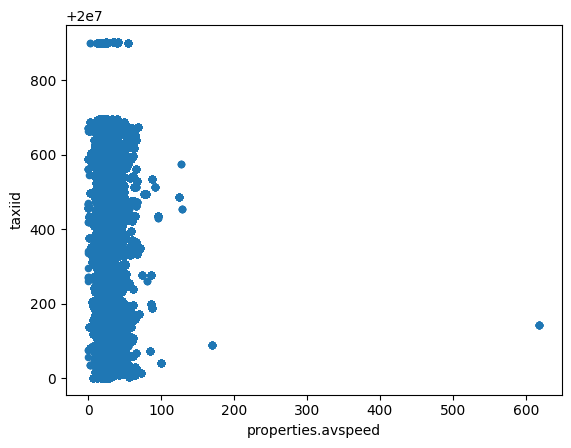

In [12]:
import matplotlib.pyplot as plt

gcod_street_df.plot(kind = 'scatter', x = 'properties.avspeed', y = 'taxiid')

plt.show()

In [13]:
pd.set_option("plotting.backend", "plotly")

In [14]:
pd.get_option("plotting.backend")

'plotly'

In [15]:
gcod_df.to_csv('data_gcod.csv')

In [16]:
gcod_street_df.to_csv('data_street.csv')

In [17]:
gcod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128831 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   type                  128831 non-null  object 
 1   geometry.coordinates  128831 non-null  object 
 2   geometry.type         128831 non-null  object 
 3   properties.avspeed    128831 non-null  float64
 4   properties.distance   128831 non-null  float64
 5   properties.duration   128831 non-null  int64  
 6   properties.endtime    128831 non-null  object 
 7   properties.maxspeed   128831 non-null  float64
 8   properties.minspeed   128831 non-null  float64
 9   properties.starttime  128831 non-null  object 
 10  properties.taxiid     128831 non-null  object 
 11  properties.tripid     128831 non-null  int64  
 12  taxiid                128831 non-null  int32  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 13.3+ MB


In [18]:
#gcod_splt_df['lon', 'lat'] = gcod_df["geometry.coordinates"].str.split(",",expand=True)
gcod_df[['lon','lat']] = pd.DataFrame(gcod_df["geometry.coordinates"].tolist(), index= gcod_df.index)
gcod_df.head(5)

,type,geometry.coordinates,geometry.type,properties.avspeed,properties.distance,properties.duration,properties.endtime,properties.maxspeed,properties.minspeed,properties.starttime,properties.taxiid,properties.tripid,taxiid,lon,lat
0,Feature,"[-8.6063, 41.1446]",LineString,16.096640,0.000000,0,2013-10-01 00:00:43,16.096640,16.096640,2013-10-01 00:00:43,20000305,417118,20000305,-8.60630,41.1446
1,Feature,"[-8.59347, 41.1508]",LineString,20.463175,0.000000,0,2013-10-01 00:18:29,20.463175,20.463175,2013-10-01 00:18:29,20000463,417135,20000463,-8.59347,41.1508
2,Feature,"[-8.67233, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105,-8.67233,41.1490
2,Feature,"[-8.67232, 41.149]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105,-8.67232,41.1490
2,Feature,"[-8.67083, 41.1488]",LineString,37.208155,6201.451072,585,2013-10-01 00:21:11,70.406355,0.200952,2013-10-01 00:11:26,20000105,417142,20000105,-8.67083,41.1488


In [19]:
gcod_df.to_csv('data_lat_lon.csv')

In [20]:
print(gcod_df.shape[0])
print(gcod_street_df.shape[0])

128831
128831
